# China vs USA in 8 figures
This analysis delves into the evolving global power dynamics, specifically focusing on the contrasting roles of the United States and China as leading superpowers as for the past decade, these nations have significantly influenced the geopolitical landscape, impacting the interactions between two prominent groups: the G7 and BRICS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in file as data frame
df = pd.read_csv('Indicators.csv')

# Create list of unique indicators, indicator codes
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values

In [3]:
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
print(Indicators.shape)

(1344, 2)


In [4]:
key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']

In [5]:
feature = 'Education'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            # Uncomment this line to print the indicators explicitely
            #print(indicator_ele)
            break

In [6]:
# Main indicators to compare contries
chosen_indicators = ['NE.TRD.GNFS.ZS',  \
                     'SI.DST.10TH.10', 'SP.DYN.LE00.IN', \
                     'NY.GDP.PCAP.PP.KD','SP.URB.TOTL.IN.ZS', 'SH.DTH.IMRT', \
                     'NE.EXP.GNFS.KD', 'NE.IMP.GNFS.KD' ]

# Subset of data with the required features alone
df_subset = df[df['IndicatorCode'].isin(chosen_indicators)]

# Chose only USA and China for Analysis
df_USA = df_subset[df['CountryName']=="United States"]
df_China = df_subset[df['CountryName']=="China"]

In [1]:
# PLotting function for comparing development indicators
def plot_indicator(indicator,delta=10):
    ds_USA = df_USA[['IndicatorName','Year','Value']][df_USA['IndicatorCode']==indicator]
    try:
        title = ds_USA['IndicatorName'].iloc[0]
    except:
        title = "None"

    xUSA = ds_USA['Year'].values
    yUSA = ds_USA['Value'].values
    ds_China = df_China[['IndicatorName','Year','Value']][df_China['IndicatorCode']==indicator]
    xchina = ds_China['Year'].values
    ychina = ds_China['Value'].values
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    plt.plot(xUSA,yUSA,label='USA')
    plt.plot(xchina,ychina,label='China')
    plt.title(title)
    plt.legend(loc=2)

    plt.subplot(122)
    plt.plot(xUSA,yUSA,label='USA')
    plt.plot(xchina+delta,ychina,label='China')
    plt.title(title + "\n Chinese Data Shifted by " +str(delta)+" Years")
    plt.legend(loc=2)

**The shifting of the Chinese data by delta years allows a comparative visualization to observe potential trends or patterns between the two countries' development indicators over time. The shift helps align the Chinese data temporally with the USA data for easier comparison.**

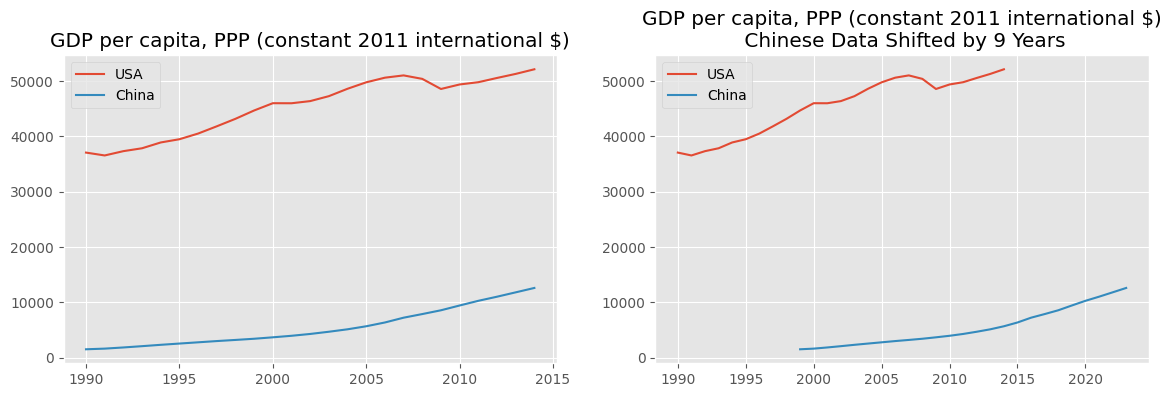

In [8]:
plot_indicator(chosen_indicators[3],delta=9)

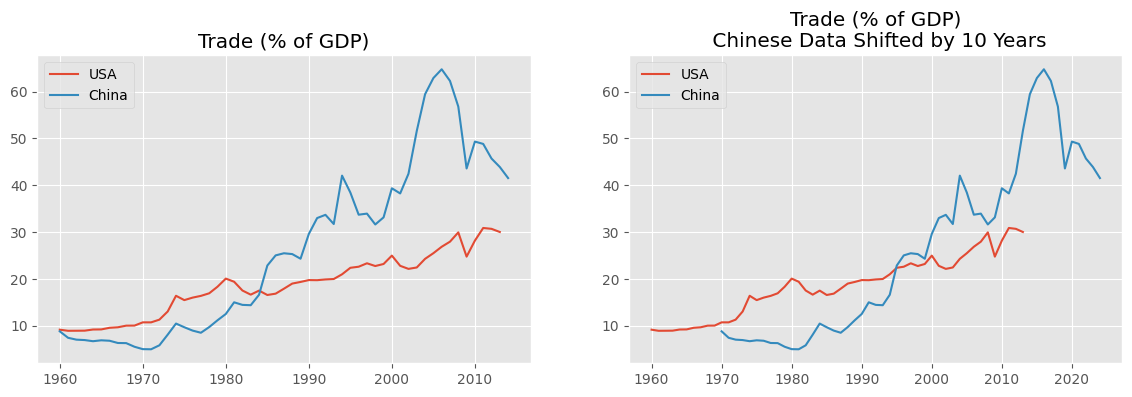

In [9]:
plot_indicator(chosen_indicators[0],delta=10)

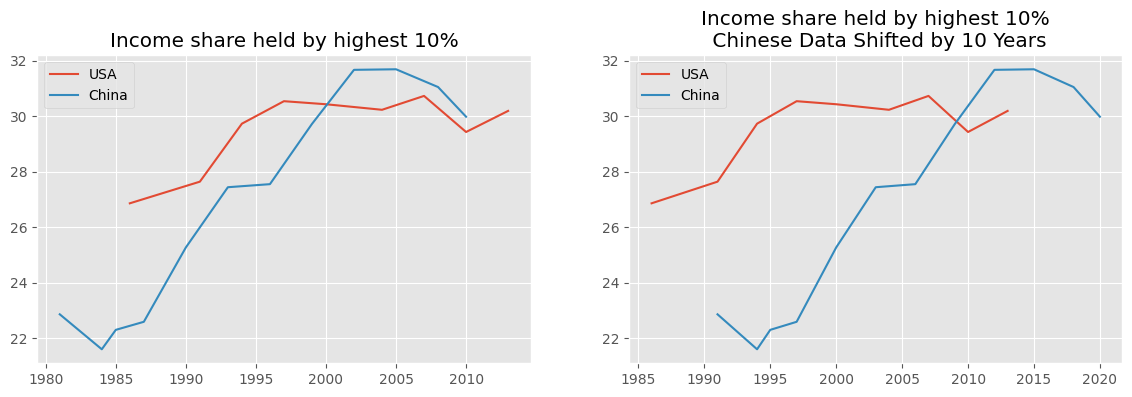

In [10]:
plot_indicator(chosen_indicators[1],delta=10)

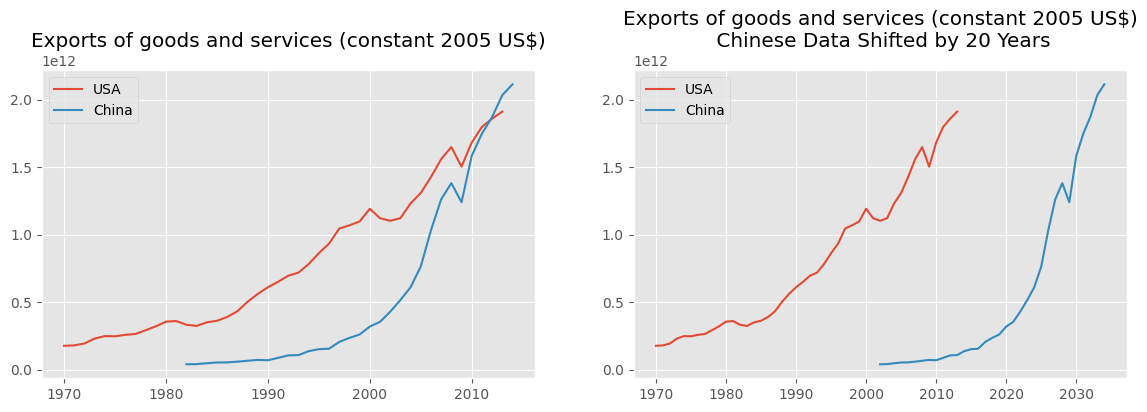

In [12]:
plot_indicator(chosen_indicators[6],delta=20)

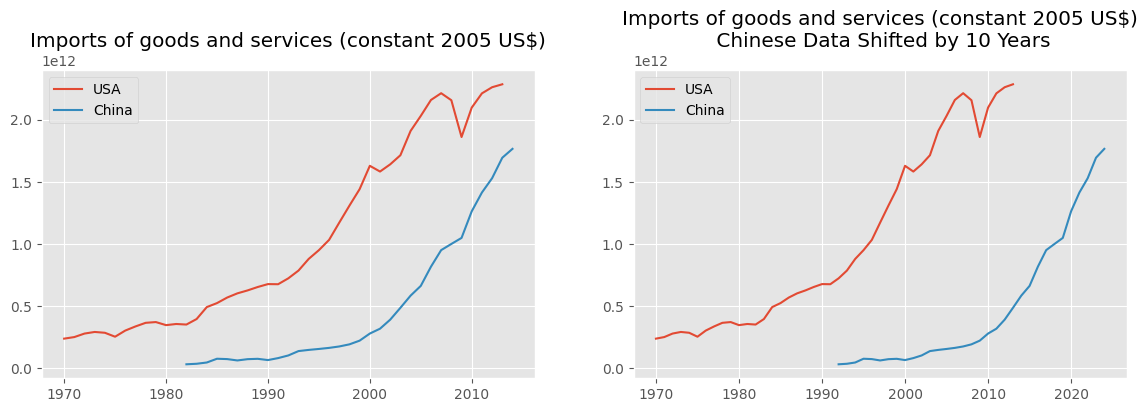

In [11]:
plot_indicator(chosen_indicators[7],delta=10)

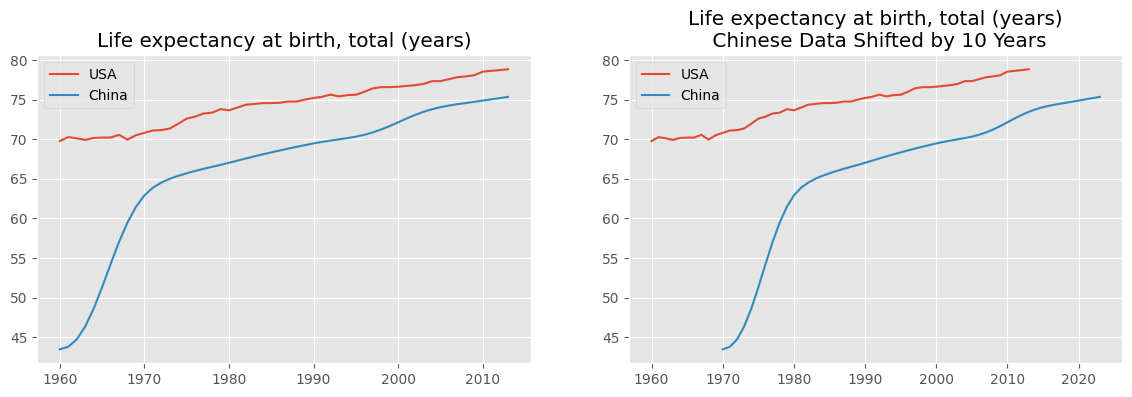

In [13]:
plot_indicator(chosen_indicators[2],delta=10)

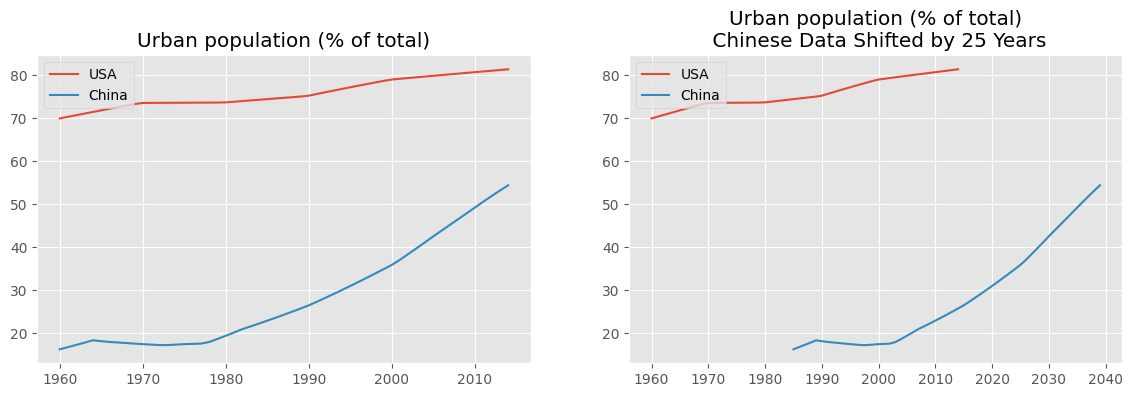

In [14]:
plot_indicator(chosen_indicators[4],delta=25)

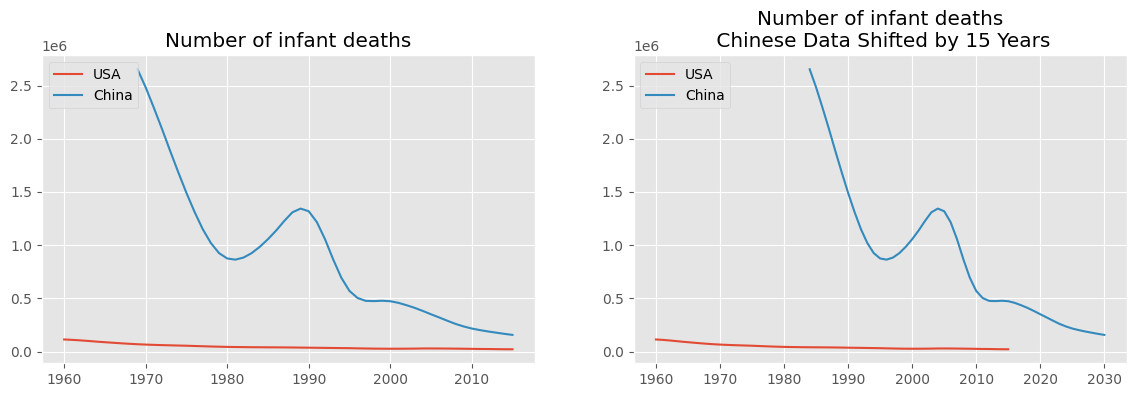

In [15]:
plot_indicator(chosen_indicators[5],delta=15)

**Conclusion:**

The USA maintains its lead over China in GDP, life expectancy, and achieving a lower rate of infant mortality. 
However, China has shown a remarkable growth trajectory, notably surpassing the USA in the export of goods and services since 2010.